 # 8. Construction of Groups

In [576]:
import colorcet
from spb import (
    plot_complex,
    plotgrid
)
from sympy import (
    Abs,
    Eq,
    eye,
    gcd,
    I,
    init_printing,
    Matrix,
    Symbol,
    symbols
)
from sympy.combinatorics import (
    AlternatingGroup,
    CyclicGroup,
    DihedralGroup,
    free_group,
    SymmetricGroup
)
from sympy.combinatorics.fp_groups import FpGroup
from sympy.combinatorics.free_groups import free_group
from sympy.combinatorics.group_constructs import DirectProduct
from sympy.combinatorics.homomorphisms import homomorphism
from sympy.combinatorics.named_groups import PermutationGroup
from sympy.combinatorics.permutations import Permutation

init_printing(perm_cyclic = False)

 A Sylow subgroup is a group that has an order which is a power of a prime and which divides the order of its supergroup by another relatively prime number.
 If there are 2 or more Sylow subgroups then they are conjugate; for example, reflections on an equilateral triangle are conjugate as rotation reflection reverse-rotation is equivalent to a reflection.

In [577]:
n_p = 4
p = 3
gcd(p, n_p) == 1

True

In [578]:
n = p * n_p
n

In [579]:
G1 = CyclicGroup(n)
G1

        PermutationGroup([       
    (0 1 2 3 4 5 6 7 8 9 10 11)])

In [580]:
G1.order()

In [581]:
P1 = G1._p_elements_group(p)
P1

         PermutationGroup([         
    (0 4 8)(1 5 9)(2 6 10)(3 7 11)])

In [582]:
P1.order()

In [583]:
P1_sylow = G1.sylow_subgroup(3)
P1_sylow

         PermutationGroup([         
    (0 4 8)(1 5 9)(2 6 10)(3 7 11)])

In [584]:
P1_sylow.order()

In [585]:
Eq(P1, P1_sylow)

 The Direct Product is similar to the Cartesian product; but there is a termwise multiplication of the elements.

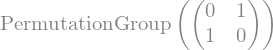

In [586]:
A2 = CyclicGroup(2)
A2

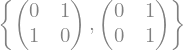

In [587]:
A2.elements

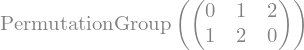

In [588]:
G2 = CyclicGroup(3)
G2

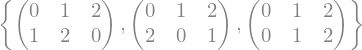

In [589]:
G2.elements

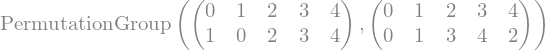

In [590]:
A2xG2 = DirectProduct(A2, G2)
A2xG2

In [591]:
A2xG2.order()

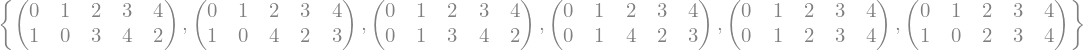

In [592]:
A2xG2.elements

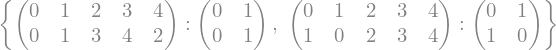

In [593]:
pi_1 = homomorphism(
    A2xG2,
    A2,
    [A2xG2.generators[0]],
    A2.generators,
    check=False
)

pi_1.images

In [594]:
A2 == pi_1.image()

True

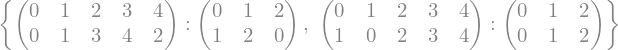

In [595]:
pi_2 = homomorphism(
    A2xG2,
    G2,
    [A2xG2.generators[1]],
    G2.generators,
    check=False
)

pi_2.images

In [596]:
G2 == pi_2.image()

True

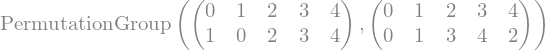

In [597]:
H2_a = Permutation([1, 0, 2, 3, 4])
H2_b = Permutation([0, 1, 3, 4, 2])
H2 = PermutationGroup(H2_a, H2_b)
H2

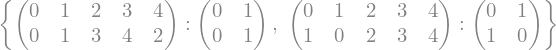

In [598]:
t1 = homomorphism(H2, A2, [H2.generators[0]], A2.generators, check=False)
t1.images

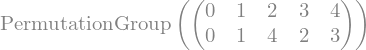

In [599]:
t1.kernel()

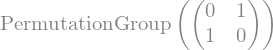

In [600]:
t1.image()

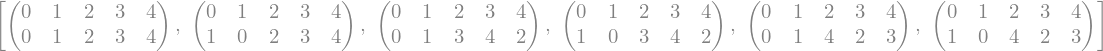

In [601]:
H2._elements

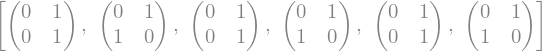

In [602]:
[t1._apply(i) for i in H2._elements]

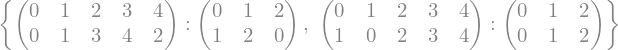

In [603]:
t2 = homomorphism(H2, G2, [H2.generators[1]], G2.generators, check=False)
t2.images

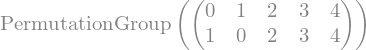

In [604]:
t2.kernel()

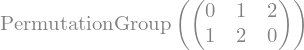

In [605]:
t2.image()

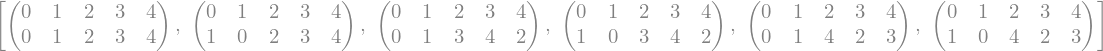

In [606]:
H2._elements

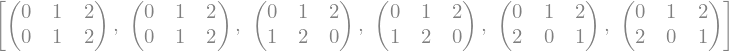

In [607]:
[t2._apply(i) for i in H2._elements]

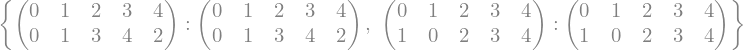

In [608]:
s = homomorphism(H2, A2xG2, H2.generators, A2xG2.generators, check=False)
s.images

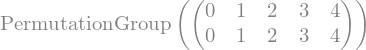

In [609]:
s.kernel()

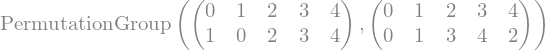

In [610]:
s.image()

In [611]:
pi_1.compose(s).image() == t1.image()

True

In [612]:
pi_2.compose(s).image() == t2.image()

True

In [613]:
A2xG2.is_abelian

True

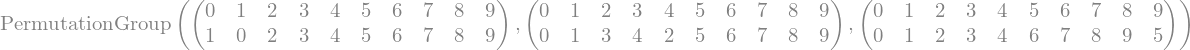

In [614]:
Z2 = CyclicGroup(2)
Z3 = CyclicGroup(3)
Z5 = CyclicGroup(5)
A30 = DirectProduct(Z2, Z3, Z5)
A30

In [615]:
A30.is_abelian

True

In [616]:
A30.order()

In [617]:
A30.abelian_invariants()

In [618]:
C30 = CyclicGroup(30)
C30

                                   PermutationGroup([                         
    (0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27

         
 28 29)])

In [619]:
C30.is_abelian

True

In [620]:
C30.order()

In [621]:
C30.abelian_invariants()

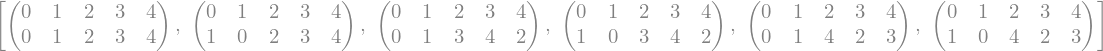

In [622]:
A2xG2_els = A2xG2._elements
A2xG2_els

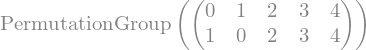

In [623]:
A2x1 = A2xG2.subgroup(A2xG2._elements[:2])
A2x1

In [624]:
A2x1.is_normal(A2xG2)

True

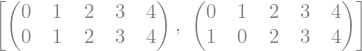

In [625]:
A2x1._elements

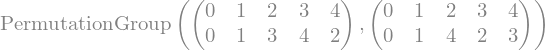

In [626]:
_1xG2 = A2xG2.subgroup([A2xG2._elements[i] for i in [0, 2, 4]])
_1xG2

In [627]:
_1xG2.is_normal(A2xG2)

True

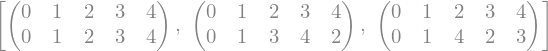

In [628]:
_1xG2._elements

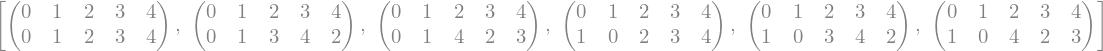

In [629]:
[x*y for x in A2x1._elements for y in _1xG2._elements]

In [630]:
AxG_free, a, g = free_group("a g")
AxG_free

In [631]:
AxG_free.is_abelian

False

In [632]:
w1 = a*g
w1

a*g

In [633]:
b = a.inverse()

w2 = g**-1*b*g**1
w2

g**-1*a**-1*g

In [634]:
w1*w2

g

In [635]:
a*b

<identity>

In [636]:
w1*w2 == (a*b) * g

True

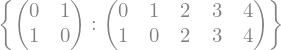

In [637]:
k_1 = homomorphism(
    A2,
    A2xG2,
    A2.generators,
    [A2xG2.generators[0]],
    check=False
)

k_1.images

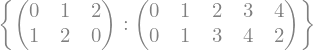

In [638]:
k_2 = homomorphism(
    G2,
    A2xG2,
    G2.generators,
    [A2xG2.generators[1]],
    check=False
)

k_2.images

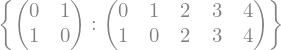

In [639]:
t1_inv = homomorphism(A2, H2, A2.generators, [H2.generators[0]], check=False)
t1_inv.images

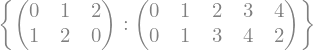

In [640]:
t2_inv = homomorphism(G2, H2, G2.generators, [H2.generators[1]], check=False)
t2_inv.images

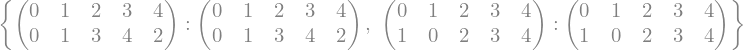

In [641]:
s_inv = homomorphism(A2xG2, H2, A2xG2.generators, H2.generators, check=False)
s_inv.images

In [642]:
s_inv.compose(k_1).image() == t1_inv.image()

True

In [643]:
s_inv.compose(k_2).image() == t2_inv.image()

True

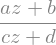

In [644]:
z =  Symbol("z", complex=True)
a, b, c, d = symbols("a b c d", integer=True)

fractional_linear_transformation = (a*z + b) / (c*z + d)
fractional_linear_transformation

In [645]:
dets_range = range(-3, 4, 1)
dets = {q*r: (q, r) for q in dets_range for r in dets_range}
dets = [
    {a: dets[l][0], b: dets[m][0], c: dets[m][1], d: dets[l][1]}
    for l in dets
    for m in dets
    if (l - m) == 1
]
dets[:4]

In [646]:
len(dets)

In [647]:
all([(a*d - b*c).subs(ds) == 1 for ds in dets])

True

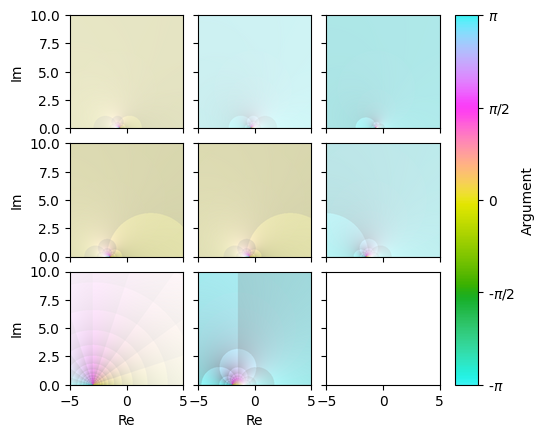

In [648]:
plots = []
for det in [dets[i] for i in range(0, len(dets))]:
    plots.append(
        plot_complex(
            fractional_linear_transformation.subs(det),
            (z, -5+0j, 5+10j),
            coloring='m',
            grid=False,
            show=False,
            legend=False,
            cmap=colorcet.CET_C7
        )
    )

plotgrid(*plots, nc=3, imagegrid=True)

In [649]:
flt = fractional_linear_transformation.subs(dets[6])
flt

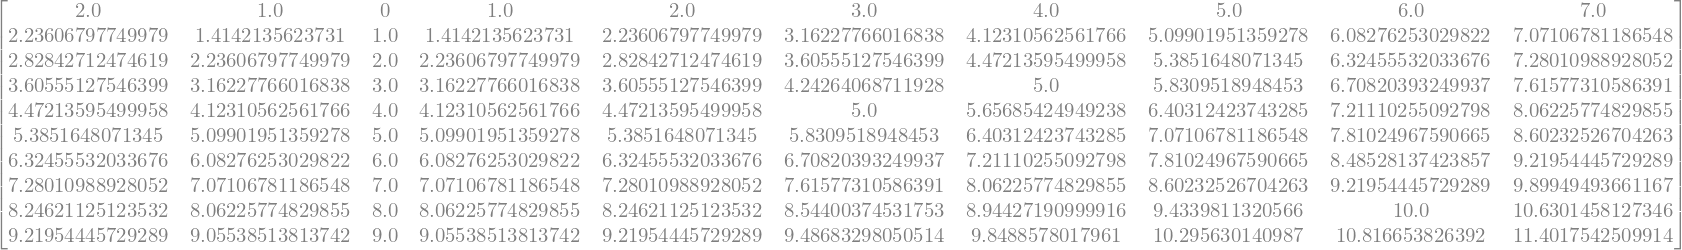

In [650]:
m = [
    [Abs(flt.subs(z, r+i*I)).evalf()
    for r in range(-5, 5)]
    for i in range(0, 10)
]

Matrix(m)

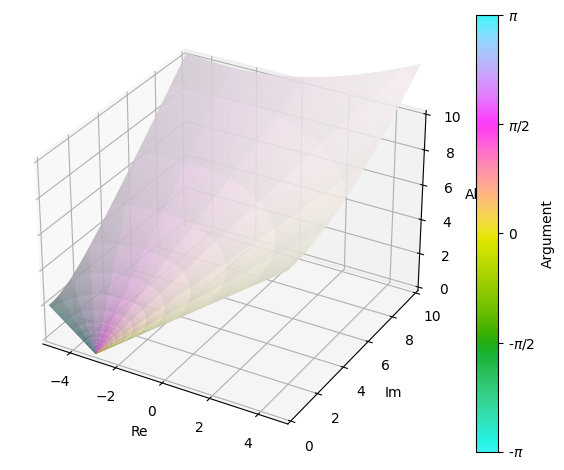

In [651]:
plot_complex(
    flt,
    (z, -5+0j, 5+10j),
    grid=False,
    coloring='m',
    cmap=colorcet.CET_C7,
    threed=True,
    zlim=(0, 10)
)

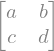

In [652]:
m2x2 = Matrix([[a, b], [c, d]])
m2x2

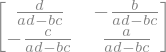

In [653]:
m2x2.inv()

In [654]:
m2x2.det()

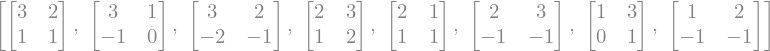

In [655]:
m2x2_group = [m2x2.subs(det) for det in dets]
m2x2_group

In [656]:
[m.det() for m in m2x2_group]

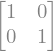

In [657]:
m_I = eye(2)
m_I

In [658]:
m_I.det()

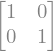

In [659]:
m_min_I = m_I.inv()
m_min_I

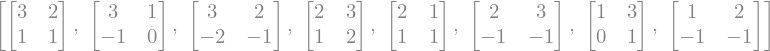

In [660]:
[m*m_I for m in m2x2_group]

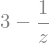

In [661]:
z_trans_ord2 = -1/z
flt_ord2 = fractional_linear_transformation.subs(z, z_trans_ord2)
flt_ord2 = flt_ord2.subs(dets[6])
flt_ord2

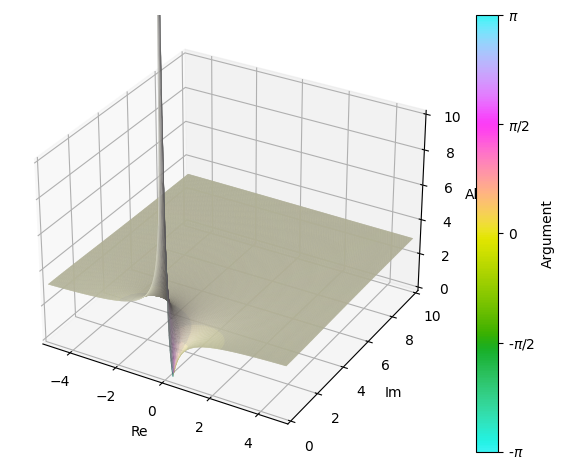

In [662]:
plot_complex(
    flt_ord2,
    (z, -5+0j, 5+10j),
    grid=False,
    coloring='m',
    cmap=colorcet.CET_C7,
    threed=True,
    zlim=(0, 10)
)

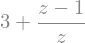

In [663]:
z_trans_ord3 = (z-1)/z
flt_ord3 = fractional_linear_transformation.subs(z, z_trans_ord3)
flt_ord3 = flt_ord3.subs(dets[6])
flt_ord3

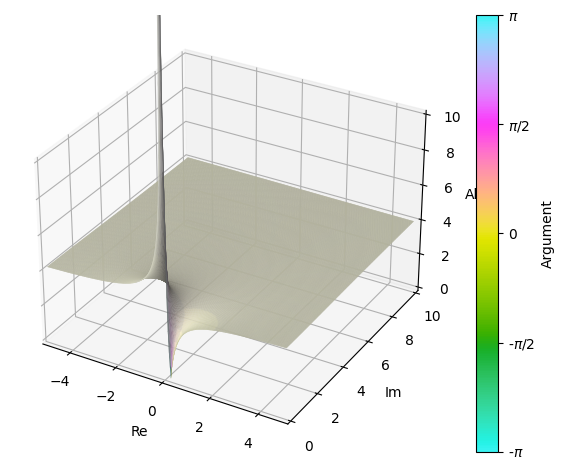

In [664]:
plot_complex(
    flt_ord3,
    (z, -5+0j, 5+10j),
    grid=False,
    coloring='m',
    cmap=colorcet.CET_C7,
    threed=True,
    zlim=(0, 10)
)

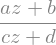

In [665]:
flt_sym = fractional_linear_transformation
flt_sym

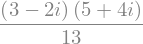

In [666]:
flt_ex = set([flt_sym.subs(z, 1+2*I).subs(det) for det in dets]).pop()
flt_ex

In [667]:
flt_ex.evalf()

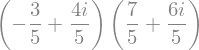

In [668]:
flt_ex_ord2 = set(
    [
        flt_sym.subs(z, z_trans_ord2).subs(z, 1+2*I).subs(det)
        for det in dets
    ]
).pop()
flt_ex_ord2

In [669]:
flt_ex_ord2.evalf()

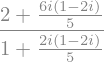

In [670]:
flt_ex_ord3 = set(
    [
        flt_sym.subs(z, z_trans_ord3).subs(z, 1+2*I).subs(det)
        for det in dets
    ]
).pop()
flt_ex_ord3

In [671]:
flt_ex_ord3.evalf()

In [672]:
(flt_ex_ord2 * flt_ex_ord3).evalf()

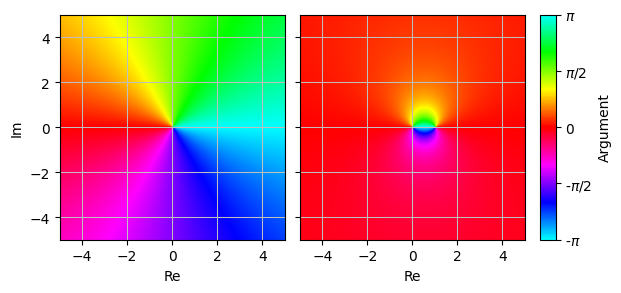

In [673]:
z_plot_1 = plot_complex(
    z_trans_ord2,
    (z, -5-5*I, 5+5*I),
    show=False
)

z_plot_2 = plot_complex(
    z_trans_ord3,
    (z, -5-5*I, 5+5*I),
    show=False
)

plotgrid(
    z_plot_1,
    z_plot_2,
    nc=2,
    imagegrid=True
)

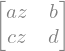

In [674]:
m2x2_z = Matrix([[a*z, b], [c*z, d]])
m2x2_z

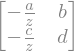

In [675]:
m_I_ord2 = m2x2_z.subs(z, z_trans_ord2)
m_I_ord2

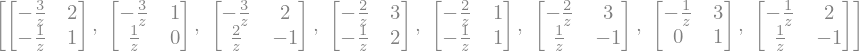

In [676]:
m2x2_group_ord2 = [m_I_ord2.subs(det) for det in dets]
m2x2_group_ord2

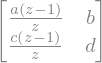

In [677]:
m_I_ord3 = m2x2_z.subs(z, z_trans_ord3)
m_I_ord3

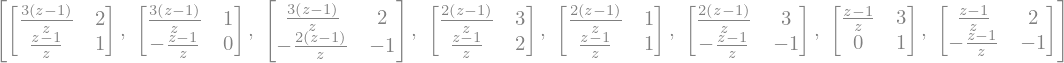

In [678]:
m2x2_group_ord3 = [m_I_ord3.subs(det) for det in dets]
m2x2_group_ord3

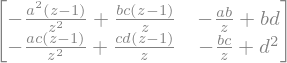

In [679]:
m_I_ord2 * m_I_ord3

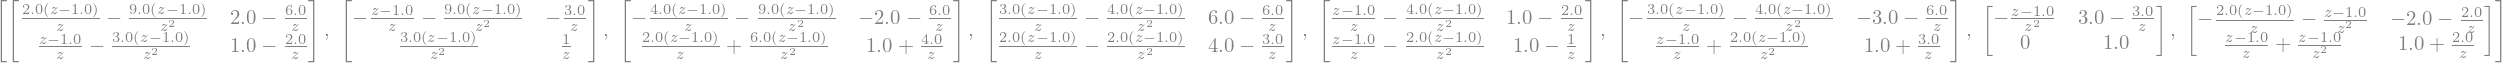

In [680]:
[(x*y).evalf() for x, y in zip(m2x2_group_ord2, m2x2_group_ord3)]

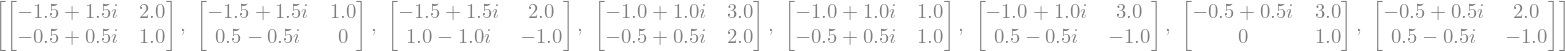

In [681]:
[m.subs(z, 1+1*I).evalf() for m in m2x2_group_ord2]

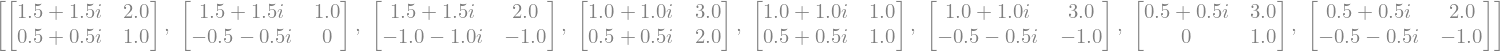

In [682]:
[m.subs(z, 1+1*I).evalf() for m in m2x2_group_ord3]

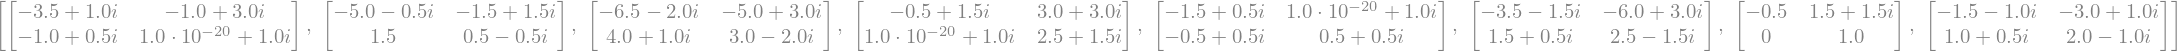

In [683]:
[
    (x*y).subs(z, 1+1*I).evalf()
    for x, y in zip(m2x2_group_ord2, m2x2_group_ord3)
]

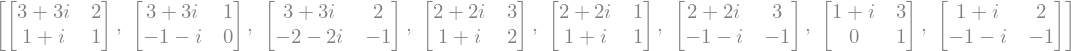

In [684]:
[m2x2_z.subs(det).subs(z, 1+1*I) for det in dets]

In [685]:
F, a, b = free_group('a, b')
F

In [686]:
H_free, g, h = free_group('g, h')
H = FpGroup(H_free, [g**2, h**3])
H

In [687]:
t_FH = homomorphism(F, H, [a, b], [g, h])
t_FH.images

{a: g, b: h}

In [688]:
t_FH(a) == g

True

In [689]:
t_FH(b) == h

True

In [690]:
A = PermutationGroup(Permutation([3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2]))
A

         PermutationGroup([        
    (0 3 6 9)(1 4 7 10)(2 5 8 11)])

In [691]:
A.order()

In [692]:
G = PermutationGroup(Permutation([6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5]))
G

          PermutationGroup([          
    (0 6)(1 7)(2 8)(3 9)(4 10)(5 11)])

In [693]:
G.order()

In [694]:
E = A * G
E

               PermutationGroup([               
         (23)(0 3 6 9)(1 4 7 10)(2 5 8 11),     
    (12 18)(13 19)(14 20)(15 21)(16 22)(17 23)])

In [695]:
E.order()

In [696]:
cosets_A_in_E = {
    tuple(sorted([e*a for a in A.elements], key=lambda x: x.rank()))
    for e in E.elements
}

cosets_A_in_E

{((12 18)(13 19)(14 20)(15 21)(16 22)(17 23), (0 3 6 9)(1 4 7 10)(2 5 8 11)(12
 18)(13 19)(14 20)(15 21)(16 22)(17 23), (0 6)(1 7)(2 8)(3 9)(4 10)(5 11)(12 1
8)(13 19)(14 20)(15 21)(16 22)(17 23), (0 9 6 3)(1 10 7 4)(2 11 8 5)(12 18)(13
 19)(14 20)(15 21)(16 22)(17 23)), ((), (0 3 6 9)(1 4 7 10)(2 5 8 11), (0 6)(1
 7)(2 8)(3 9)(4 10)(5 11), (0 9 6 3)(1 10 7 4)(2 11 8 5))}

In [697]:
all(y in E._elements for x in cosets_A_in_E for y in x)

True

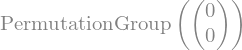

In [698]:
one = CyclicGroup(1)
one

In [699]:
homo_1A = homomorphism(one, A, one._generators, [A.identity])
homo_1A.images

{(): ()}

In [700]:
k = homomorphism(A, E, A._generators, [E._generators[0]])
k.images

{(0 3 6 9)(1 4 7 10)(2 5 8 11): (0 3 6 9)(1 4 7 10)(2 5 8 11)}

In [701]:
pi = homomorphism(E, G, [E._generators[1]], [G._elements[1]], check=False)
pi.images

{(12 18)(13 19)(14 20)(15 21)(16 22)(17 23): (0 6)(1 7)(2 8)(3 9)(4 10)(5 11),
 (0 3 6 9)(1 4 7 10)(2 5 8 11): ()}

In [702]:
homo_G1 = homomorphism(G, one, G._generators)
homo_G1.images

{(0 6)(1 7)(2 8)(3 9)(4 10)(5 11): ()}

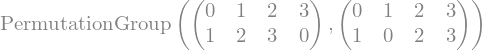

In [703]:
S4 = SymmetricGroup(4)
S4

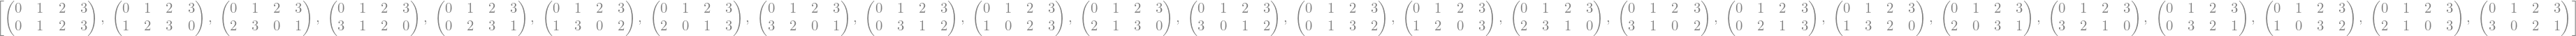

In [704]:
S4._elements

In [705]:
S4.order()

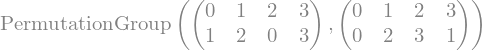

In [706]:
A4 = AlternatingGroup(4)
A4

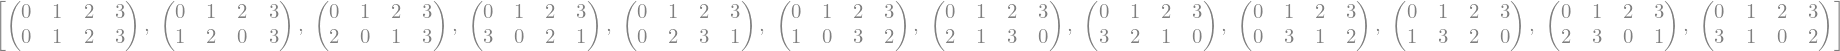

In [707]:
A4._elements

In [708]:
A4.order()

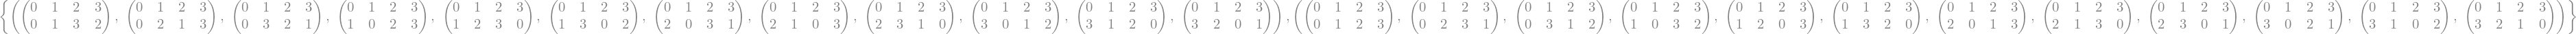

In [709]:
cosets_A4_in_S4 = {
    tuple(sorted({s*a for a in A4.elements}, key=lambda x: x.rank()))
    for s in S4.elements
}

cosets_A4_in_S4

In [710]:
all(y in S4._elements for x in cosets_A4_in_S4 for y in x)

True

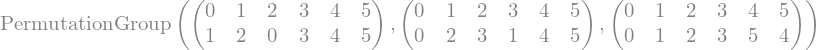

In [711]:
A4xC2 = DirectProduct(A4, CyclicGroup(2))
A4xC2

In [712]:
A4xC2.order()

In [713]:
all(x in S4 for x in A4xC2)

False

In [714]:
A.is_normal(E, strict=False)

True

In [715]:
phi_e = {
    tuple({e*a*(e**-1) for a in A._elements})
    for e in E._elements
}

phi_e = [a.resize(A._elements[1].length()) for b in phi_e for a in b]
phi_e

[(0 3 6 9)(1 4 7 10)(2 5 8 11), (0 9 6 3)(1 10 7 4)(2 11 8 5), (), (0 6)(1 7)(
2 8)(3 9)(4 10)(5 11)]

In [716]:
Aut_A = PermutationGroup([x for x in phi_e])
Aut_A

          PermutationGroup([          
      (0 3 6 9)(1 4 7 10)(2 5 8 11),  
      (0 9 6 3)(1 10 7 4)(2 11 8 5),  
    (0 6)(1 7)(2 8)(3 9)(4 10)(5 11)])

In [717]:
A.is_abelian

True

In [718]:
phi = homomorphism(
    E,
    Aut_A,
    [E._generators[0]],
    [Aut_A._elements[1]],
    check=False
)

phi.images

{(12 18)(13 19)(14 20)(15 21)(16 22)(17 23): (), (0 3 6 9)(1 4 7 10)(2 5 8 11)
: (0 3 6 9)(1 4 7 10)(2 5 8 11)}

In [719]:
theta = homomorphism(
    G,
    Aut_A,
    [G._generators[0]],
    [Aut_A._elements[2]]
)

theta.images

{(0 6)(1 7)(2 8)(3 9)(4 10)(5 11): (0 6)(1 7)(2 8)(3 9)(4 10)(5 11)}

In [720]:
semidirect_product_AG = {
    (a * theta(g), g * h)
    for a in A._elements
    for b in A._elements
    for g in G._elements
    for h in G._elements
}

semidirect_product_AG

{((0 3 6 9)(1 4 7 10)(2 5 8 11), (0 6)(1 7)(2 8)(3 9)(4 10)(5 11)), ((0 3 6 9)
(1 4 7 10)(2 5 8 11), ()), ((0 6)(1 7)(2 8)(3 9)(4 10)(5 11), (0 6)(1 7)(2 8)(
3 9)(4 10)(5 11)), ((0 6)(1 7)(2 8)(3 9)(4 10)(5 11), ()), ((0 9 6 3)(1 10 7 4
)(2 11 8 5), (0 6)(1 7)(2 8)(3 9)(4 10)(5 11)), ((0 9 6 3)(1 10 7 4)(2 11 8 5)
, ()), ((), (0 6)(1 7)(2 8)(3 9)(4 10)(5 11)), ((), ())}

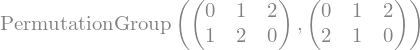

In [721]:
delta_3 = DihedralGroup(3)
delta_3

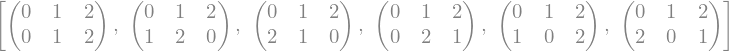

In [722]:
delta_3._elements

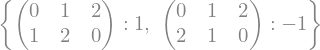

In [723]:
t = {delta_3.generators[0]: 1, delta_3.generators[1]: -1}
t

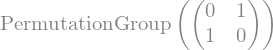

In [724]:
Z2 = CyclicGroup(len(t))
Z2

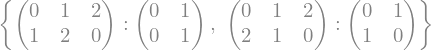

In [725]:
pi_2 = homomorphism(
    delta_3,
    Z2,
    [delta_3._generators[1]],
    [Z2._elements[1]],
    check=False
)

pi_2.images

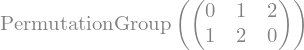

In [726]:
pi_2.kernel()

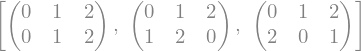

In [727]:
R = pi_2.kernel()._elements
R

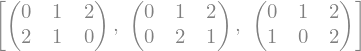

In [728]:
D = [e for e in pi_2.domain._elements if not e in pi_2.kernel()._elements]
D

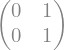

In [729]:
t_even = pi_2.codomain._elements[0]
t_even

In [730]:
all([pi_2(r) == t_even for r in R])

True

In [731]:
all([pi_2(d**2) == t_even for d in D])

True

In [732]:
all([pi_2(d*r*d**-1) == pi_2(r**-1) for d in D for r in R])

True